In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import random

import seaborn as sns
import matplotlib.pyplot as plt

iris_df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

# Week 3

## Empirical rule and Z-score

**Z-score**
How many standard deviations aways from mean a value is?

$$
zscore(x) = \frac{x - \mu}{\sigma}
$$

## CDF and PDF

> TODO

**How to plot distributions:**
```python
sns.distplot() # All variations of distribution plot
sns.histplot() # default - histogram
sns.kdeplot()  # kind='kde' - kernel density estimation (smooth line)
sns.ecdfplot() # kind='exdf' - empirical cumulative distribution function
sns.rugplot()  # different, show ticks for each data point
```

For multiple distributions use:
```python
sns.violinplot()
```

In [3]:
# Z-value computations
zscore_df = pd.DataFrame({"z": [i for i in range(-3, 4)]})
zscore_df["zscore"] = stats.norm.cdf(zscore_df["z"])
zscore_df["zscore_around_mean"] = stats.norm.cdf(zscore_df["z"]) - stats.norm.cdf(-zscore_df["z"])
zscore_df

,z,zscore,zscore_around_mean
0,-3,0.001350,-0.997300
1,-2,0.022750,-0.954500
2,-1,0.158655,-0.682689
3,0,0.500000,0.000000
4,1,0.841345,0.682689
5,2,0.977250,0.954500
6,3,0.998650,0.997300


RAW


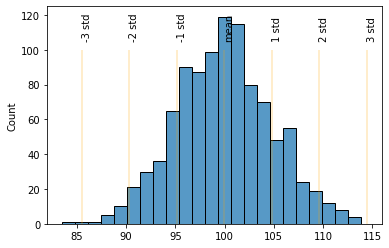

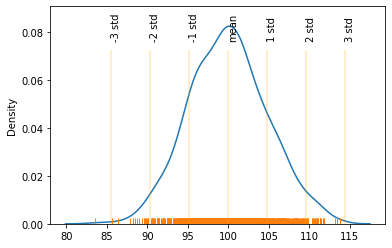

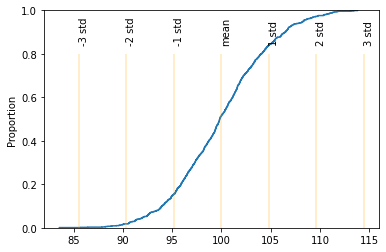

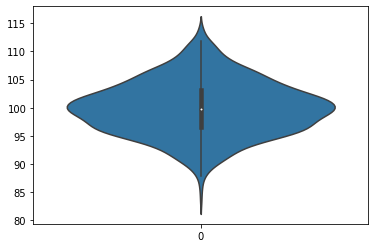

STANDARDIZED


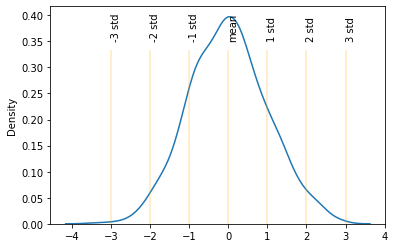

In [4]:
def standardize(x):
    mean = np.mean(x)
    std = np.std(x)
    inner = lambda x: (x - mean) / std
    return inner(x)


def add_empirical_rule_annotations(ax, x):
    std = np.std(x)
    mean = np.mean(x)

    x_bound = [mean + i * std for i in range(-3, 4)]
    y_bound = ax.get_ylim()

    ax.vlines(x=x_bound, ymin=y_bound[0], ymax=y_bound[1] * 0.8, color="orange", lw=2, alpha=0.2)
    for idx, x in enumerate(x_bound):
        text = f"{idx - 3} std" if idx != 3 else "mean"
        ax.annotate(text=text, xy=(x, (y_bound[1] - y_bound[0]) * 0.85 + y_bound[0]), rotation=90)


n = 1000
mu, std = 100, 5

print("RAW")
measured = np.random.normal(mu, std, n)
ax = sns.histplot(data=measured)
add_empirical_rule_annotations(ax, measured)
plt.show()

# This is how to combine plots
ax = sns.kdeplot(data=measured)
ax = sns.rugplot(data=measured)
add_empirical_rule_annotations(ax, measured)
plt.show()

ax = sns.ecdfplot(data=measured)
add_empirical_rule_annotations(ax, measured)
plt.show()

ax = sns.violinplot(data=measured)
plt.show()

print("STANDARDIZED")
standardized = standardize(measured)
ax = sns.kdeplot(data=standardized)
add_empirical_rule_annotations(ax, standardized)
plt.show()

In [5]:
# Shorthand for z-scores
x = np.random.normal(2, 0.5, 5)
z = stats.zscore(x)
print(x)
print(z)

[1.32865087 1.38392909 2.61592801 1.94912223 1.68254674]
[-0.98940675 -0.87137812  1.75915441  0.3354078  -0.23377735]


## Normal approximation



## Binomial setting and Normal approximation

**Example:**

What is the probability of it most $l$ successes from $n$ attempts.
This is $l$ binomial settings that we can not sum together since they are not mutually exclusive and we would have to use *PIE* - *Principle of Inclusion and Exclusion*.

Or we can approximate it, given that the binomial curve is similar to normal curve, something like $n>50$ and use normal approximation to determine this probability.

In [6]:
# TODO create binomial setting and compare number of draws to normal distribution

n = 50
k = 4
math.comb(n, k)

#np.random.binomial()

230300

## Population, Parameters, Statistics, Samples and Standard Errors

* population - all entities that we can draw a sample from
* parameter - property of population we want to estimate e.g. $\mu$, $\sigma$
* sample - draw from population
* statistics - value we estimate from a sample
* standard error $SE$ - of statistics tells us how far off statistics is from its expected value - *true* value of the parameter
    - $SE(x_n) = \frac{\sigma}{\sqrt(n)}$ -> *Squared root law* where $x_n$ bar is mean of sample of size $n$ from population ($\mu$, $\sigma$)
    - notice that we don't know $\sigma$ - population parameter thus we can't give precise $SE$
    - it is *not* affected by the size of the population itself just by the size of the sample
    - i.e. it gives us formula to get the sample size we want given the precision we want (assuming we know $\sigma$)

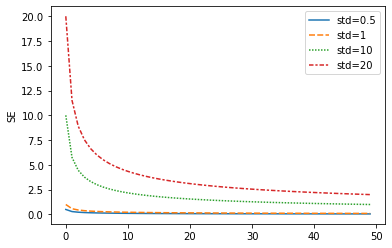

In [7]:
stds = [0.5, 1, 10, 20]
sample_size = np.linspace(1, 100)

df = pd.DataFrame({"sample_size": sample_size})
for std in stds:
    df[f"std={std}"] = std / np.sqrt(sample_size)

# TODO: Learn to pivot or use wide-dataframes
df["sample_size"] = df.sample_size.astype("category")
ax = sns.lineplot(data=df)

# Combine lineplots this way, but it doesn't show legend
# for std in stds:
#     ax = sns.lineplot(x="sample_size", y=f"std={std}", data=df, legend="")

ax.set(ylabel="SE")
plt.show()

## EV and SE of Sum, Percentages

**Sums**

If we are interested in sum of $n$ draws $S_n$ rather than the average $\bar{x_n}$?

$$
S_n = n * x_n
\\
E(S_n) = n * mu
\\
SE(S_n) = sqrt(n) * std
\\
$$

Careful that while with the increasing sample size $n$ the $SE(x_n)$ goes down the $SE(S_n)$ increases.


**Percentages**

*Question:* What percentage of likely voters approve of the way the US Presedent is handling his job?

Each voter either approves (labeled `1`) or not (labeled `0`). Then the answer is the sum of all the labels.

$S_n$ is the number of voters that approve.

$$
E(\text{percentage of 1s}) = \mu * 100\%
\\
SE(\text{percentage of 1s}) = \frac{\sigma}{\sqrt{n}} * 100\%
$$

These hold only for draw with replacement, however with small $\text{sample\_size} / \text{population\_size}$ it is alright.

**Expected Value and Standard Error**

Fox variable $x$ that has $k$ possible values - $x_1, x_2, ... x_k$

$$
E(\mu) = \frac{\sum_{i}[P(x_i) * x_i])}{n}
\\
E(sum) = n * \mu
$$

And its Standard Error

$$
\sigma^2 = \sum_{i=1}^n (x_i - x_n)^2 * P(x_i)
\\
SE(sum) = \sqrt{n} * \sigma
$$


## Three types of histograms

1. Probability histogram
2. Sample histogram / Empirical histogram of real data
3. Probability histogram of statistics e.g. $S_{100} = \text{number of tails in 100 throws}$

## Law of Large numbers

> The square root law says that $SE(x_n)$, the standard error of the sample mean, goes to zero as the sample size increases.
> Therefore the $x_n$ will be close to its expected value $\mu$ if the sample size is large.

It applies to averages and therefore also percentages but not for sums as their SE increases.
This has to be sampling with replacement.

## Central Limit Theorem

> When sampling with replacement and $n$ is *large*, then the sampling distribution of the sample sum (or average or percentage) approximately follows the normal curve.

* statistics has to be sum, however averages and percentages are also sums so we can use CLT.
* thus for random variable $X$ representing some statistics we can use normal approximation - to standardize $z_i = \frac{x_i - E(X)}{SE(X)}$
* the more skewed the population distribution is the bigger sample size $n$ we need

# Week 4 - predictions, regression

## Correlation coefficient

$$
r = \frac{1}{n} * \sum_{i=1}^{n} \frac{x_i - x_n}{\sigma_x} * \frac{y_i - y_n}{\sigma_y}
  = \frac{1}{n} * \sum_{i=1}^n zscore(x_i) * zscore(y_i)
$$

If both $x$ and $y$ are above/below their respective mean correlation coefficient is positive otherwise it is negative.

r = 0.90
corrcoef = 0.90


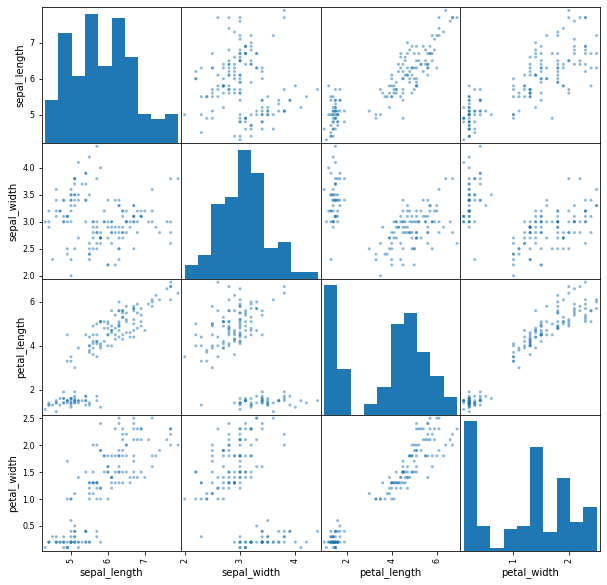

In [8]:
def correlattion_coefficient(x, y):
    return sum(standardize(x) * standardize(y)) / n

n = 50
x = np.linspace(0, 10, n)
y = x**2 + np.random.uniform(-20, 20, n)

print(f"r = {correlattion_coefficient(x, y):.2f}")
print(f"corrcoef = {np.corrcoef(x, y)[0,1]:.2f}")

from pandas.plotting import scatter_matrix
scatter_matrix(iris_df, figsize=(10, 10))
plt.show()


<AxesSubplot:>

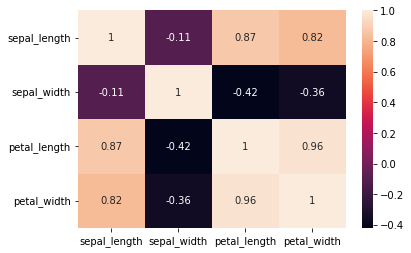

In [9]:
# Simple way to view correlation
sns.heatmap(iris_df.corr(), annot=True)

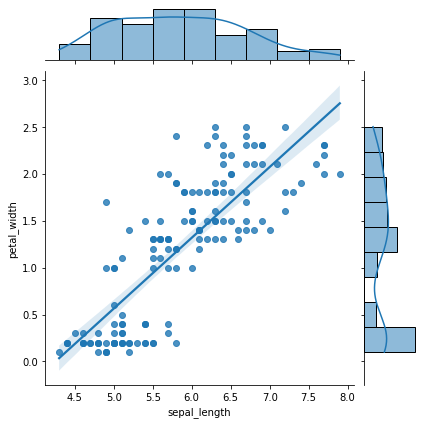

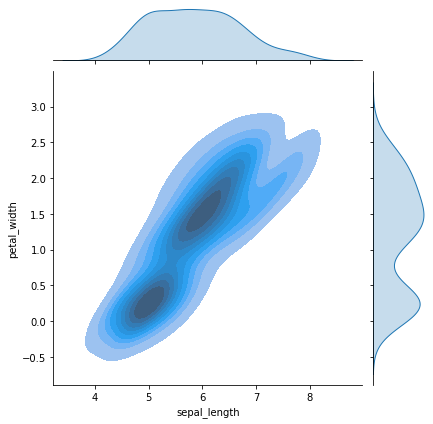

In [10]:
sns.jointplot(x='sepal_length', y='petal_width', data=iris_df, kind='reg') # this one does the regression as well, see below
sns.jointplot(x='sepal_length', y='petal_width', data=iris_df, kind='kde', fill=True)

## Regression line

Given data $(x_1, y_1), (x_2, y_2),... (x_n, y_n)$ line that goes through these points is a regression line.

Its descriptions would be $\hat{y_i} = a + b * x_i$.
* $y_i$ is the observed value
* $\hat{y_i}$ estimate of $y_i$ given by the regression line

One way to find $a$ and $b$ is to use the least square distnace method:

### Method of least squares - regression line

$$
\text{minimize: } \sum_{i=1}^n (y_i - \hat{y_i})^2 = \sum_{i=1}^n (y_i - (a + b * x_i))^2
$$


Somehow it holds that:
$$
b = r * \frac{s_y}{s_x}
\\
a = \bar{y} + b \bar{x}
$$

Predictions of $y$ for given $x$ thus needs - $s_x, s_y, \bar{x}, \bar{y}$

### Regression towards mean

For $x=\bar{x} \implies \hat{y}=\bar{y}$

$$
\hat{y} = a + bx = \bar{y} - b \bar{x} + b \bar{x} = \bar{y}
$$

> Q: If we were to move 1 standard deviation from $\bar{x}$ how would $\hat{y}$ change?

$$
\text{For } x = \bar{x} + s_x
\\
\hat{y} = a + bx = a + r \frac{s_y}{s_x} (\bar{x} + s_x) = a + b \bar{x} + r s_y
$$

> A: If $x$ increases by $s_x$, $\bar{y}$ changes by $r s_y$

And since $s_y \in [-1, 1]$ change in $\hat{y}$ is smaller than change in $x$ scaled to respective standard deviations.
It means that the line is made in a way that given points would be "going" towards mean - e.g. if you've scored the best on the midterm you won't be best on the finals.


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

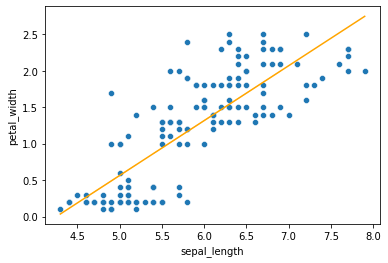

In [13]:
sepal_length = iris_df["sepal_length"]
petal_width = iris_df["petal_width"]
(a, b) = np.polyfit(x=sepal_length, y=petal_width, deg=1)
petal_width_estimate = sepal_length * a + b

sns.scatterplot(x=sepal_length, y=petal_width)
sns.lineplot(x=sepal_length, y=petal_width_estimate, color="orange")

## Normal approximation on regression line

Given that a regression line estimates follow normal distribution, it is possible to approximate them using normal approximation in addition to just providing an estimate.

To do normal approximation we need:
* a mean - $\hat{y}$
* and standard deviation - $\sqrt{1 - r^2} * s_y$

This allows to answer questions such as: What percentage of data with x above 40 had y above 61?
1. Compute $\hat{y}(40)$
2. Do normal approximation with $\mu = \hat{y}$ and $\sigma - $\sqrt{1 - r^2} * s_y$
3. That is $zscore = \frac{60 - \mu}{\sigma}$
4. From $zscore$ compute percentages as `scipy.stats.norm.cdf(zscore)` and get percentage that were below 61
5. Do 1 - that and get above 61

In [ ]:
1 - stats.norm.cdf(-0.29)

0.10027256795444206

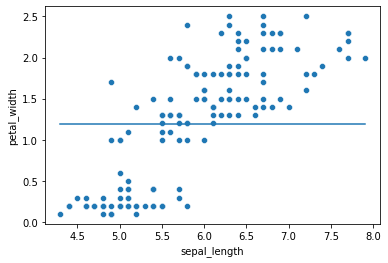

In [21]:
x = sepal_length
y = petal_width
ax = sns.scatterplot(x=x, y=y)
y_hat = np.mean(y)
r = np.corrcoef(x, y)[0,1]
sigma = math.sqrt(1 - (r**2)) * np.std(y)
vals = stats.norm.pdf(x, mu, sigma)
# TODO: this does not really work but it is a worthy attempt
ax.plot(np.linspace(np.min(x), np.max(x), 150), vals + y_hat)

## Residual plots, heteroskedasticity, and transformations

Difference between actual value $y_i$ and predicted value $\hat{y_i}$ is called a residual $e_i$.
$$
e_i = y_i - \hat{y_i}
$$

Ideally residual plot should be spread all over the place - we get a horizontal band that doesn't show any structure.

If residual plot shows some pattern - curvature, line etc. it means that the linear regression is not ideal, it cannot estimate points well.

### Heteroskedasticity

If scatter showes fan-out or fan-in shape it means that the varience changes with x values.

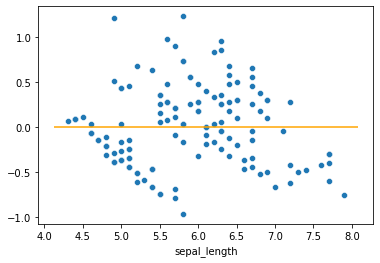

Example of invalid use of regression


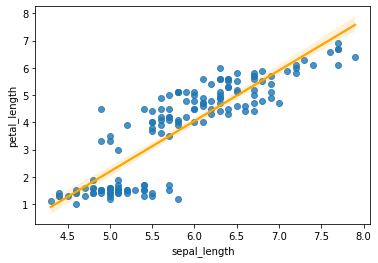

A bit weird looking - downwards facing residual plot


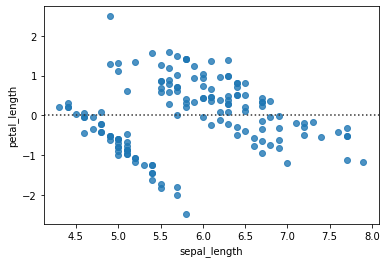

In [22]:
sepal_length
residual = petal_width - petal_width_estimate

ax = sns.scatterplot(x=sepal_length, y=residual)
ax.hlines(y=0, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color="orange")
plt.show()

print("Example of invalid use of regression")
sns.regplot(x="sepal_length", y="petal_length", data=iris_df, line_kws={"color": "orange"})
plt.show()

print("A bit weird looking - downwards facing residual plot")
sns.residplot(x="sepal_length", y="petal_length", data=iris_df)
plt.show()

### Transformations

It may still be possible to analyze such data with linear regression.
The data need to be transformed somehow depending on what curvarute the residual plot shows:
* for $x^2$ curve consider $\sqrt{y}$
* for fan-out / heteroskedastic shape consider $log_a(y)$

In [ ]:
# TODO: add example

## Outliers and Influential Points

Residual plot nicely show outliers.

### Leverage

A point which is far from the $\bar{x}$ has high potential to change the slope of the regression line - it has high *leverage*.

### Extrapolation

Avoid estimating $\hat{y}$ for $x \notin [x_{min}, x_{max}]$, even though the trend may be linear in given range it may not be outside of it.

### R-squared

Regression analysis is often presented as $R^2 = r^2$ where $r$ is the correlation coefficient.
It gives the fraction of the variation in the $y$-values that is explained by the regression line.

So $1-r^2$ is the fraction of the $y$-values that is left in the residuals.

# Week 6 - confidence intervals, hypothesis testing

According to CLT, a sample percentage (0/1 labels) follows a normal curve with expected value $E(\mu)$ and $SE = \frac{\sigma}{\sqrt{n}}$ where $n$ is the sample size.

By empirical rule there is 95% chance that the sample percentage is no more than 2 $SE$ away from population percentage $\mu$.
This is equivalent that the population percentage $\mu$ is no more than 2 $SE$ away from sample percentage $\mu$.

### Using the Central Limit Theorem to find a Confidence Interval

$estimate \pm z * SE$

Therefore:
* 95% confidence interval is $E(\mu) \pm 1.96 * SE$ often using 2
* 99% confidence interval is $E(\mu) \pm 2.58 * SE$

> Keep in mind that population $\sigma$ used for $SE$ computation is *unknown*!

It is incorrect to say that there is 95% probability that $\mu$ is within this CI, because population parameter $\mu$ is some unknown constant, it has no probabilistic properties!

Rather, correct interpretation of 95% CI, is that there is 95% change that our random sample encompasses population parameter $\mu$.
The randomness (and probability) is in the random sample not in the population parameter.

### Rule of thumb

When dealing with 95% CI of percentages is $\text{extimated percentage} \pm \frac{1}{\sqrt{n}}$.

That holds because even though we don't know $\sigma$ we know that $\sigma = \sqrt{p (1-p)} \le \frac{1}{2}$ no matter what $p$ is.
$$
\text{estimated percentage} \pm z * SE
\\
z * SE = z * \frac{\sigma}{\sqrt{n}} = 2 * \frac{1}{2\sqrt{n}} = \frac{1}{\sqrt{n}}
$$

For 99.0% confidence interval z=0.24 i.e. sample_estimate+-0.49


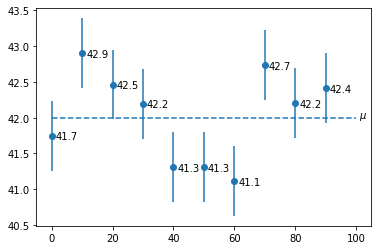

Each vertical line represents a possible sample and its 99.0% confidence interval.
Note that some confidence intervals do not include the population mean mu.


In [99]:
mu = 42
se = 2
xmin, xmax = 0, 100
ci_percentage = 0.99

cis = 10 # number of CIs


z = stats.norm.pdf(ci_percentage)
print(f"For {ci_percentage * 100}% confidence interval z={z:.2f} i.e. sample_estimate+-{(z * se):.2f}")

plt.hlines(mu, xmin, xmax, linestyles="dashed")
plt.annotate("$\mu$", (xmax+1, mu))

np.random.seed(42)
sample_estimates = np.random.uniform(low=mu-0.5*se, high=mu+0.5*se, size=cis)
xs = [i for i in range(xmin, xmax, int((xmax - xmin) / cis))]
plt.vlines(x=xs, ymin=sample_estimates + z*se, ymax=sample_estimates - z*se)
plt.scatter(xs, sample_estimates)
for x, estimate in zip(xs, sample_estimates):
    plt.annotate(f"{estimate:.1f}", xy=(x, estimate), xycoords="data", xytext=(4, -4), textcoords="offset points")
plt.show()

print(f"Each vertical line represents a possible sample and its {ci_percentage * 100}% confidence interval.")
print("Note that some confidence intervals do not include the population mean mu.")